In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
zhfont1 = matplotlib.font_manager.FontProperties(fname='simkai.ttf')
import wordcloud
import string
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [2]:
odata = pd.read_csv("letterwithyearver.csv", encoding='gbk')

In [3]:
W2Vmodel = Word2Vec.load('Word60.model')

In [4]:
data_notitle = odata.drop('dtitle',axis=1)

In [5]:
data_noNan = data_notitle.dropna(subset=["dcontributor"])

In [6]:
data_nowc = data_noNan[~data_noNan['dcontributor'].str.contains(u'？|■')]

In [7]:
allYear = set(data_nowc['Year'].values)

everyInterFrame for save Frames of every 5 years
constructorList a list of dict for costructor:count of every 5 years
......

In [8]:
everyInterFrame = []
constructorList = []
allConstructor = {}
subjcetList = []
allSubject = {}
order = ['dcontrubutor','dsubject','Year']

In [9]:
def proprecessEverInter(inY, Frame):
    
    construEle = {}
    subjcetEle = {}
    dContrubutor = []
    dSubject = []
    dYear = []
    
    for index in Frame.index:
        names, subjects, year = Frame.loc[index].values[0], Frame.loc[index].values[1], Frame.loc[index].values[2]
        nameList = names.split(';')
        subjectList = subjects.split(';')
        
        for oname in nameList:
            name = oname.strip(string.punctuation)
            if name[-1] == "等":
                name = name[0:-1]
            for subject in subjectList:
                dContrubutor.append(name)
                dSubject.append(subject)
                dYear.append(year)
                
                if name not in construEle.keys():
                    construEle[name] = 0
                construEle[name] += 1
                
                if name not in allConstructor.keys():
                    allConstructor[name] = 0
                allConstructor[name] += 1
                
                if subject not in subjcetEle.keys():
                    subjcetEle[subject] = 0
                subjcetEle[subject] += 1
                
                if subject not in allSubject.keys():
                    allSubject[subject] = 0
                allSubject[subject] += 1
    
    #construEle = sorted(construEle.items(), key=lambda d: d[1], reverse=True) 
    #subjcetEle = sorted(subjcetEle.items(), key=lambda d: d[1], reverse=True) 
    constructorList.append(construEle)
    subjcetList.append(subjcetEle)
    
    construct_dict = {'dcontrubutor':dContrubutor,'dsubject':dSubject,'Year':dYear}
    
    resFrame = pd.DataFrame(construct_dict)
    
    return resFrame

In [10]:
for index, year in enumerate(allYear):
    #print(index, year)
    tmpFrame = data_nowc[data_nowc['Year'] == year]
    oneByOneFrame = proprecessEverInter(index, tmpFrame)
    oneByOneFrame = oneByOneFrame[order]
    everyInterFrame.append(oneByOneFrame)

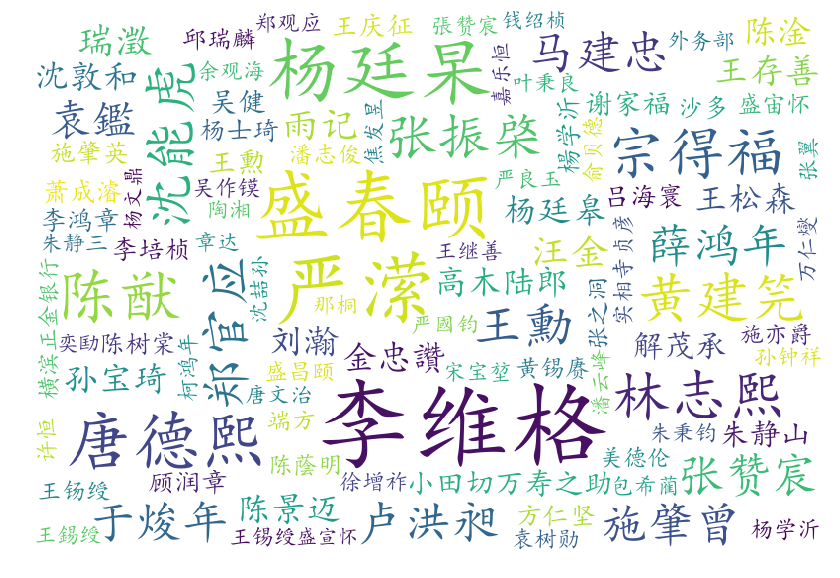

In [11]:
wocl = wordcloud.WordCloud(font_path='simkai.ttf',mask=None, background_color='white', max_words=100, max_font_size=100,width=800,
    height=550)
wcConstructor = wocl.generate_from_frequencies(allConstructor)
plt.figure(figsize=(15,10))
plt.imshow(wcConstructor)
plt.axis('off')
#plt.figure(figsize=(10, 15))
plt.show()

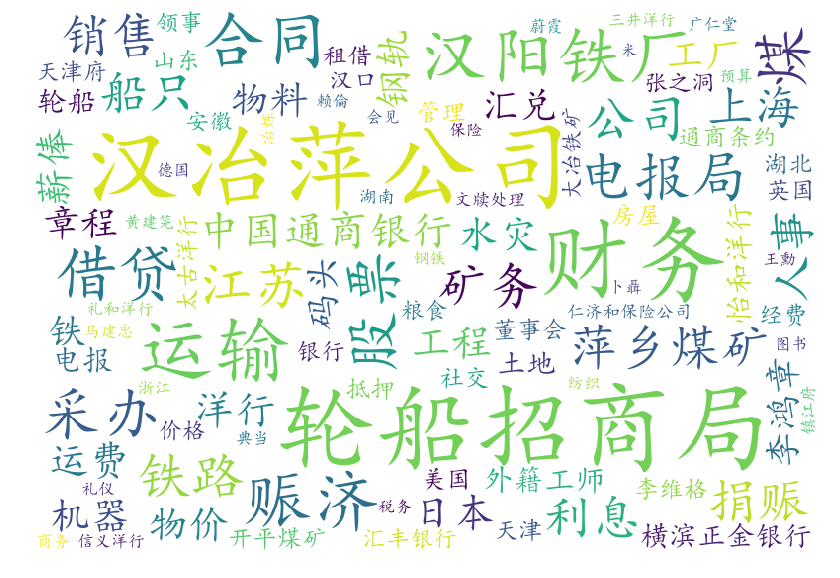

In [12]:
wcSubject = wocl.generate_from_frequencies(allSubject)
plt.figure(figsize=(15,10))
plt.imshow(wcSubject)
plt.axis('off')
#plt.figure(figsize=(10, 15))
plt.show()

In [13]:
laC = sorted(allConstructor.items(), key=lambda d: d[1], reverse=True) 
top10Name = []
for tup in laC[0:10]:
    top10Name.append(tup[0])

In [14]:
finres = []
for cdict in constructorList:
    res = []
    for name in top10Name:
        if name in cdict.keys():
            res.append(cdict[name])
        else:
            res.append(0)
    finres.append(res)

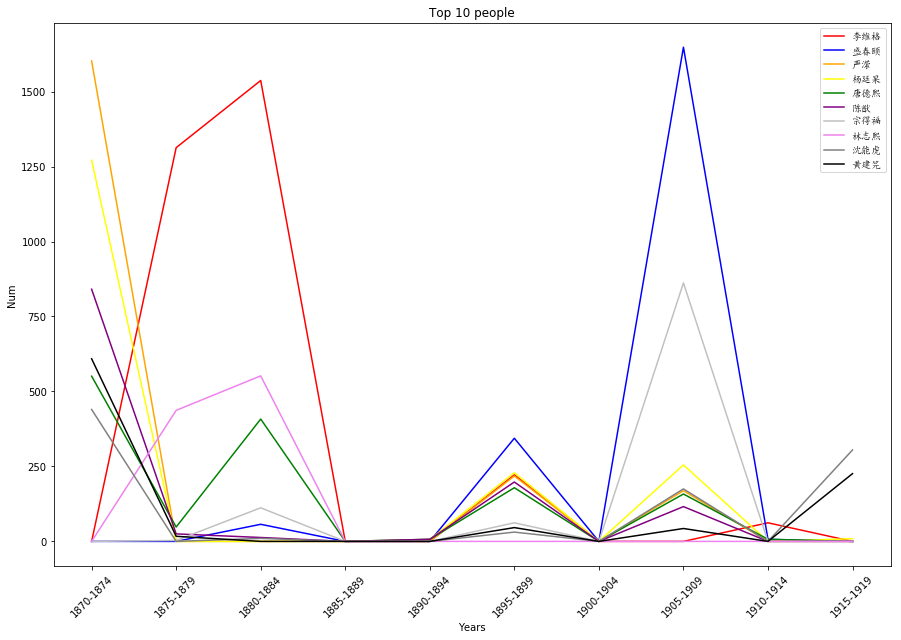

In [15]:
colors = ['red','blue','orange','yellow','green','purple','silver','violet','gray','black','yellowgreen','chocolate','brown','blueviolet','aqua']
aY = sorted(list(allYear))
plt.figure(figsize=(15,10))
for i in range(10):
    plt.plot(aY, [finres[x][i] for x in range(10)], c=colors[i], label=top10Name[i])
plt.legend(prop=zhfont1)
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Num')
plt.title("Top 10 people")
#plt.figure(figsize=(10, 15))
plt.show()

In [16]:
laS = sorted(allSubject.items(), key=lambda d: d[1], reverse=True) 
top10title = []
for tup in laS[0:10]:
    top10title.append(tup[0])

In [17]:
finres = []
for cdict in subjcetList:
    res = []
    for title in top10title:
        if title in cdict.keys():
            res.append(cdict[title])
        else:
            res.append(0)
    finres.append(res)

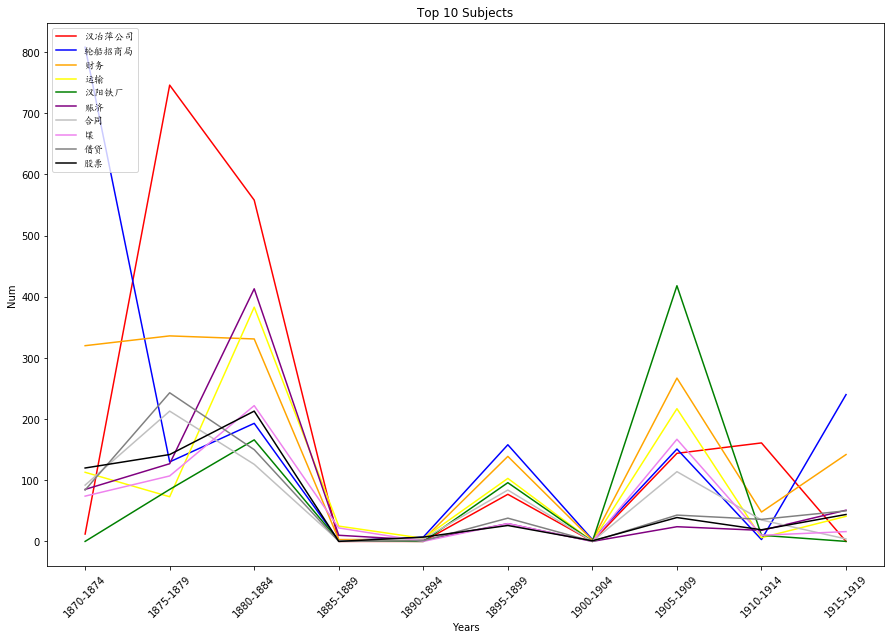

In [18]:
plt.figure(figsize=(15,10))
for i in range(10):
    plt.plot(aY, [finres[x][i] for x in range(10)], c=colors[i], label=top10title[i])
plt.legend(loc='upper left', prop=zhfont1)
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Num')
plt.title("Top 10 Subjects")
#plt.figure(figsize=(10, 15))
plt.show()

In [19]:
laS = sorted(allSubject.items(), key=lambda d: d[1], reverse=True) 
top100title = []
for tup in laS[0:100]:
    top100title.append(tup[0])

In [20]:
pca = PCA(n_components=2)
pca.fit(W2Vmodel[W2Vmodel.wv.vocab])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

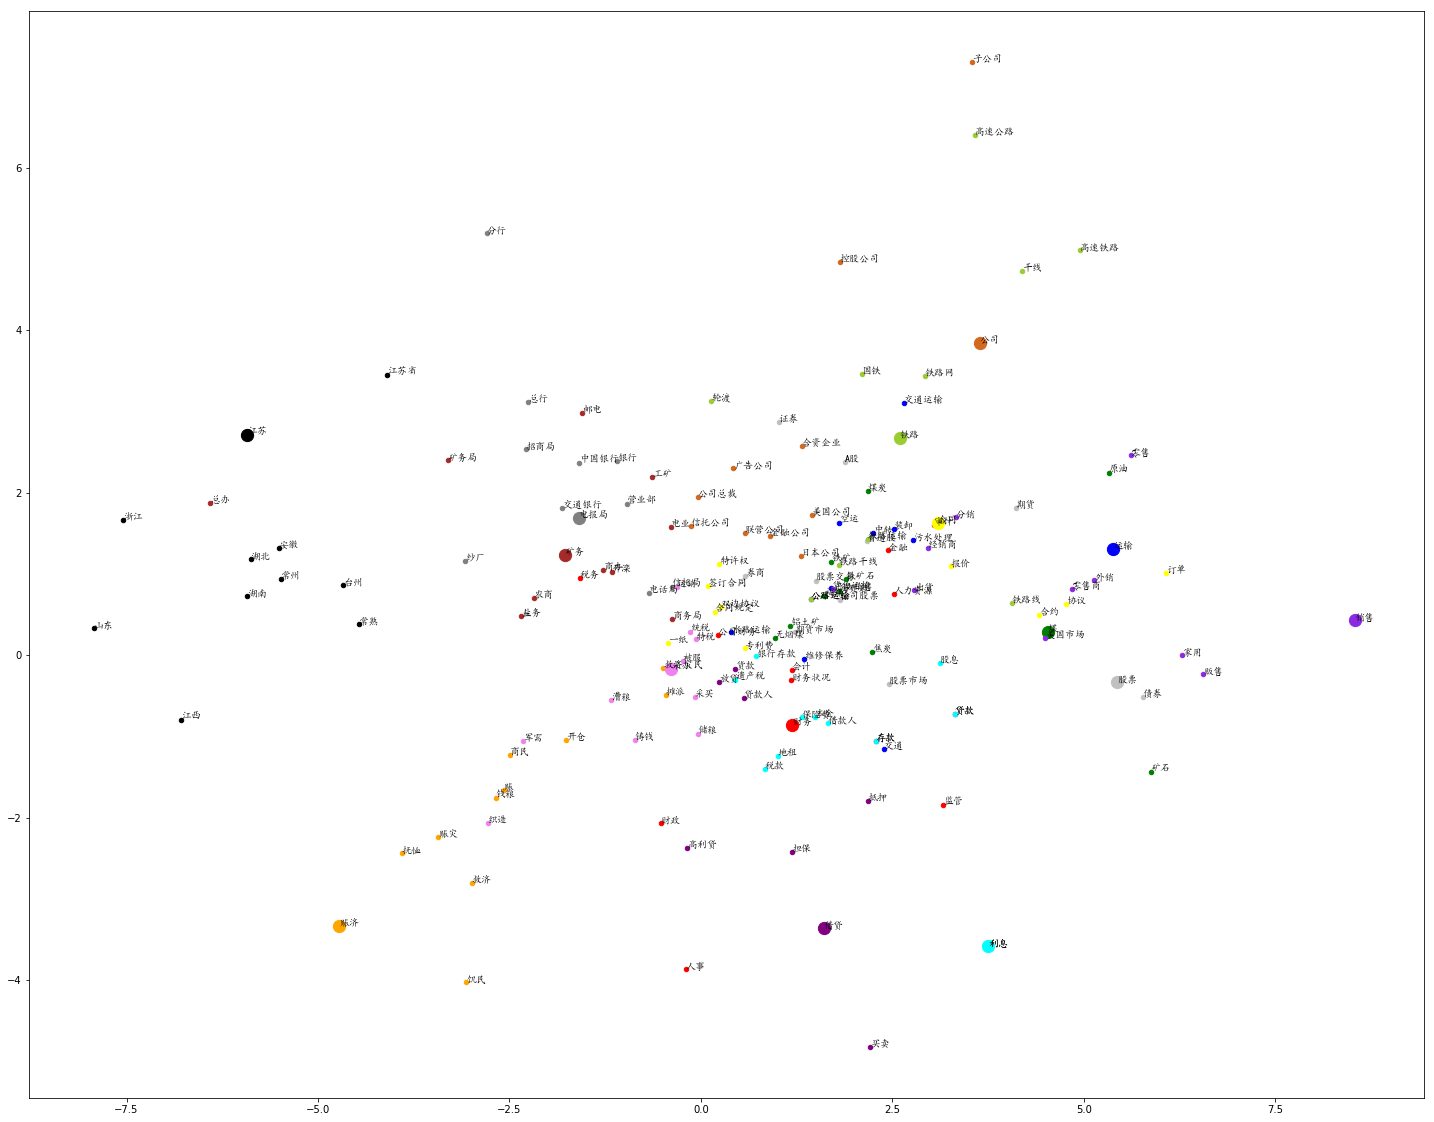

['财务', '运输', '赈济', '合同', '煤', '借贷', '股票', '采办', '电报局', '江苏', '铁路', '公司', '矿务', '销售', '利息']


In [21]:
plt.figure(figsize=(25,20))
ind = 0
subshow = []
for word in top100title:
    if word in W2Vmodel.wv.index2word:
        sim = W2Vmodel.most_similar(word)
        simp = [x[0] for x in sim]
        for si in simp:
            #print(si)
            #print(W2Vmodel[si])
            sdict = pca.transform([W2Vmodel[si]])
            #print(sdict)
            plt.scatter(sdict[0][0],sdict[0][1],s=20,c=colors[ind])
            plt.annotate(si, xy=(sdict[0][0],sdict[0][1]),fontproperties=zhfont1)
        wordc = pca.transform([W2Vmodel[word]])
        plt.scatter(wordc[0][0],wordc[0][1],s=150,c=colors[ind])
        plt.annotate(word, xy=(wordc[0][0],wordc[0][1]),fontproperties=zhfont1)
        ind += 1
        subshow.append(word)
        if ind == 15:
            break
#plt.legend(loc='upper left', prop=zhfont1)
plt.show()
print(subshow)